# Simple scenario

## Introduction

This notebook is based on the "create_simple_scenario" scenario. It expands its functionality by creating the scenario largely from the `electricity.xlsx` file instead of the agent file. This allows to create deterministic grid scenarios from the beginning.

### Required Files

The scenario setup uses the following files:
- **YAML files:** Define configuration for agents (`agents.yaml`), grids (`grids.yaml`), markets (`markets.yaml`), and scenario setup (`setup.yaml`).
- **Excel files:** Contain the grid with the agents and their components (`electricity.xlsx`). Make sure that the buses are assigned to the right regions (`zone` column in Excel file). Missing information is filled using the agents config file.

All files are placed in a structured folder (`scenario_with_grid`). Its name will automatically be used for the scenario name (unless overwritten)

In [1]:
from hamlet import Creator, Executor, Analyzer

## Step 1: Scenario Creation

This step generates the scenario based on YAML and Excel configurations. This time most of the information stems from the `electricity.xlsx` file as it also contains most of the agent information. 

In [2]:
# Path to the scenario configuration folder
name = "scenario_with_grid"
path_configs = f"./{name}"

In [3]:
# Instantiate Creator and generate the scenario
creator = Creator(path=path_configs)
creator.new_scenario_from_grids()

Successfully created scenario: 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]                                                          

## Step 3: Scenario Execution

Execute the scenario created previously. Hamlet runs the defined scenario and produces results.

The `num_workers` parameter defines how many CPU cores to use for simulation. It is set to one to not call multiprocessing. To use multiprocessing you preferably call it from a python file using the following command:

```python

if __name__ == "__main__":
    sim = Executor(path)
    sim.run()


In [4]:
# Path to the scenario created
path_scenario = f"../../scenarios/{name}"

In [5]:
# Instantiate Executor and run the simulation
executor = Executor(path_scenario, num_workers=1)
executor.run()


0it [00:00, ?it/s]
Start execution:   0%|          | 0/24 [00:00<?, ?it/s]
Executing timestamp 2021-03-23 23:00:00+00:00 for region_tasks scenario_with_grid:   0%|          | 0/24 [00:00<?, ?it/s]
Executing timestamp 2021-03-23 23:00:00+00:00 for grid:   0%|          | 0/24 [00:04<?, ?it/s]                           
Executing timestamp 2021-03-23 23:00:00+00:00 for grid:   4%|▍         | 1/24 [00:05<02:10,  5.68s/it]
Executing timestamp 2021-03-24 00:00:00+00:00 for region_tasks scenario_with_grid:   4%|▍         | 1/24 [00:05<02:10,  5.68s/it]
Executing timestamp 2021-03-24 00:00:00+00:00 for grid:   4%|▍         | 1/24 [00:08<02:10,  5.68s/it]                           
Executing timestamp 2021-03-24 00:00:00+00:00 for grid:   8%|▊         | 2/24 [00:08<01:24,  3.82s/it]
Executing timestamp 2021-03-24 01:00:00+00:00 for region_tasks scenario_with_grid:   8%|▊         | 2/24 [00:08<01:24,  3.82s/it]
Executing timestamp 2021-03-24 01:00:00+00:00 for grid:   8%|▊         | 2/24 [00:10

## Step 4: Scenario Analysis

Analyze and visualize the results obtained from scenario execution.

The analysis provides visual insights into scenario outcomes, which helps understand scenario dynamics and performance.

In [6]:
# Path to simulation results (you can add multiple results for plots that compare different scenarios)
path_results = {name: f"../../results/{name}"}

In [7]:
# Create the analyzer object
sim = Analyzer(path_results)

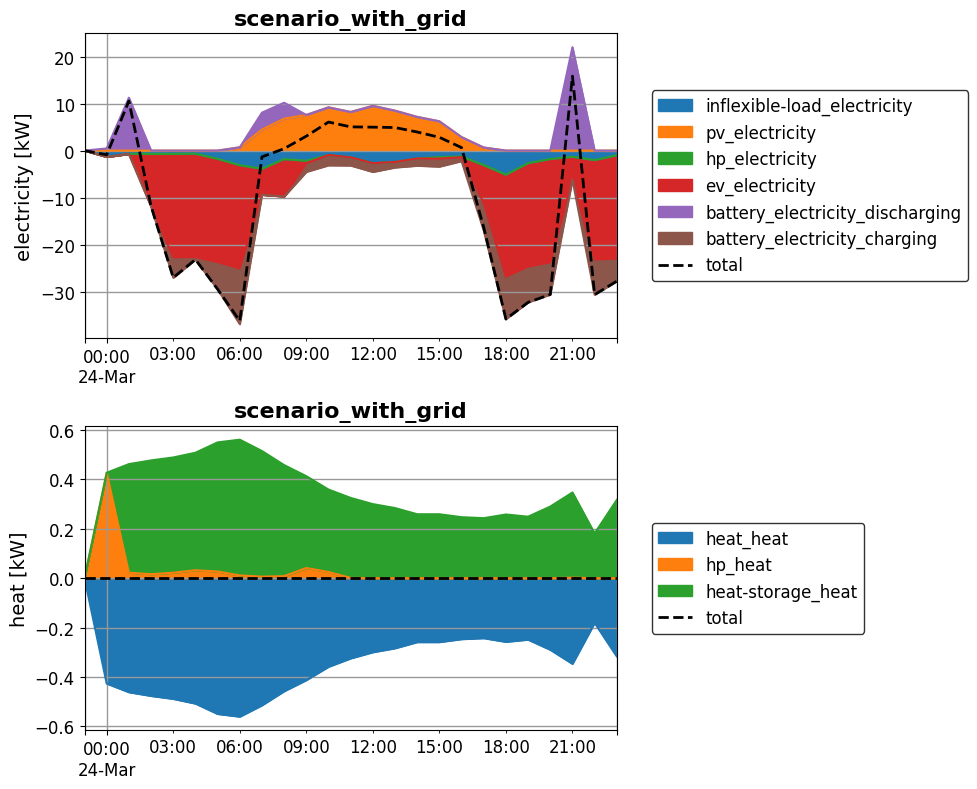

<function hamlet.analyzer.agents.agent_plotter.AgentPlotter.plot_all_meters_data(self, **kwargs)>

In [8]:
# Plot all meters data for the agents, i.e. when was energy produced and consumed
sim.agents.plot_all_meters_data(save_path=None)  # save_path is None by default

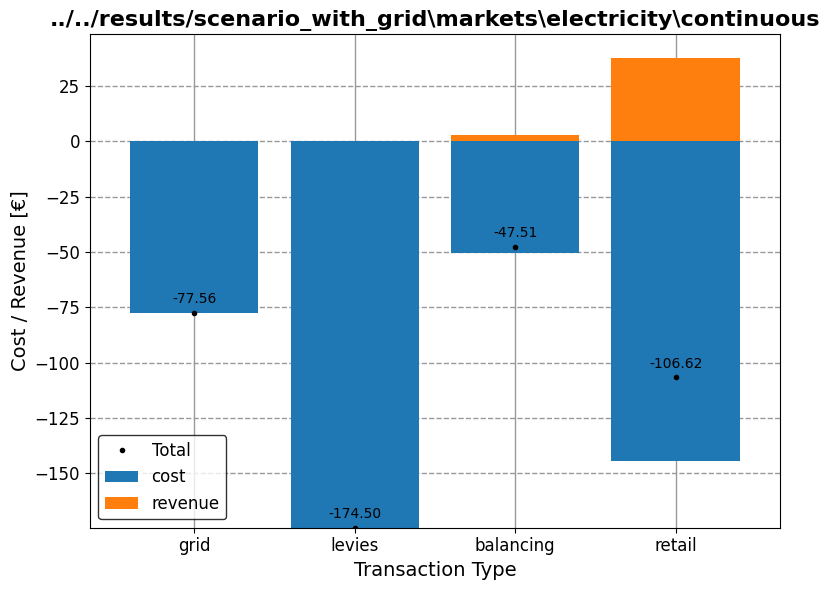

<function hamlet.analyzer.markets.market_plotter.MarketPlotter.plot_total_balancing(self, **kwargs)>

In [9]:
# Plot the total costs and revenues of each energy price component
sim.markets.plot_total_balancing()

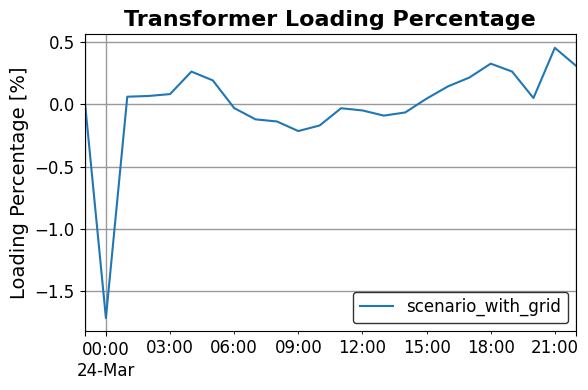

<function hamlet.analyzer.grids.grid_plotter.GridPlotter.plot_electricity_transformer_loading(self, **kwargs)>

In [21]:
# Plot the transformer loading of the grid
sim.grids.plot_electricity_transformer_loading()